# Intelligence Artificielle Avancée
# TP6- Apprentissage de représentation avec les Auto-Encodeurs (AEs)

Un auto-encodeur est une technique d'apprentissage non supervisé qui extrait des représentations pertinentes latentes à partir de données (encodage) en apprenant au réseau à ignorer le «bruit» du signal.


Le réseau d'auto-encodeur a trois couches : une couche d'entrée, une couche cachée pour l'encodage (encodeur) et une couche de décodage (décodeur) de sortie. En utilisant la rétropropagation, l'algorithme non supervisé s'entraîne en continu en définissant les valeurs de sortie cibles pour égaler les entrées. Cela force la plus petite couche cachée d'encodage à utiliser la réduction de dimension pour éliminer le bruit et reconstruire les entrées.


### Voici un petit exemple sous Keras:

In [1]:
import keras
from keras import layers

# C'est la taille de nos représentations encodées
encoding_dim = 32  # 32 floats

# Ceci est notre image d'entrée
input_img = keras.Input(shape=(784,))

# "encoded" est la représentation encodée de l'entrée
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" est la reconstruction de données d'entrée
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Ce modèle mappe une entrée à sa reconstruction
autoencoder = keras.Model(input_img, decoded)

# Ce modèle mappe une entrée à sa représentation latente
encoder = keras.Model(input_img, encoded)

# Ceci est notre entrée codée (32 dimensions)
encoded_input = keras.Input (shape = (encoding_dim,))

# Récupérer la dernière couche du modèle d'autoencodeur
decoder_layer = autoencoder.layers [-1]

# Créer le modèle de décodeur
decoder = keras.Model (encoded_input, decoder_layer (encoded_input))

# Configuration du modèle

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Préparons nos données d'entrée. Nous utilisons des chiffres MNIST, et nous rejetons les étiquettes (puisque nous ne sommes intéressés que par l'encodage / décodage des images d'entrée).

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Nous normaliserons toutes les valeurs entre 0 et 1 et nous aplatirons les images 28x28 en vecteurs de taille 784.

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Entraînons maintenant notre autoencodeur pour 50 époques:

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2751 - val_loss: 0.1876
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1707 - val_loss: 0.1546
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1454 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1288 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1178 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1106 - val_loss: 0.1063
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1054 - val_loss: 0.1018
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1017 - val_loss: 0.0989
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0990 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0972 - val_lo

Après 50 époques, l'autoencodeur peut atteindre à une valeur de perte de train / validation stable d'environ 0,09. On peut essayer de visualiser les entrées reconstruites et les représentations encodées. Nous utiliserons Matplotlib.

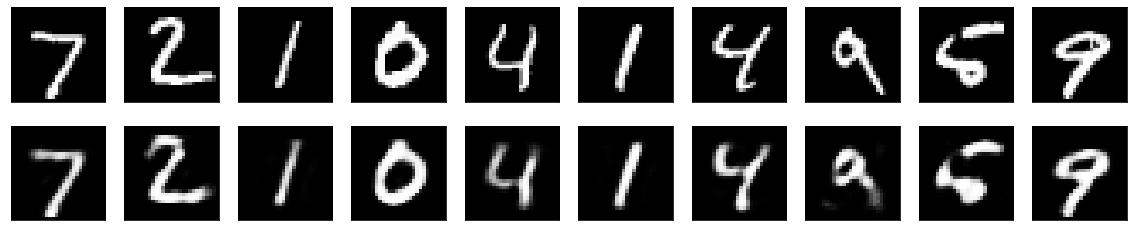

In [5]:
# Encoder et decoder quelques digits (test set)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# Utiliser Matplotlib
import matplotlib.pyplot as plt

n = 10  # Nombre de digits à afficher
plt.figure(figsize=(20, 4))
for i in range(n):
    # affichage des images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Affichage des images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercice 1.**

On voudrait développer un modèle d'Autoencodeur permettant d'encoder des données en entrée à une taille petite (code) et de les reconstruire en utilisant la bibliothèque de Keras.

1) Générer aléatoirement de données de dimensions (1000, 100), c'est à dire 1000 échantillons et 100 features

In [6]:
# A vous

2) Normaliser toutes les valeurs de données générées entre 0 et 1

In [7]:
# A vous

3) Développer le modèle d'Autoencodeur selon l'architecture suivante : 
- Les tailles des couches cachées : 80, 50 et 20 (20 est la taille de la couche Bottleneck) 
- La fonction d’activation : ReLu
- Optimiseur : ADAM, learning rate par défaut. 
- La fonction de perte : MSE

In [8]:
# A vous

4) Afficher l'architecture du modèle 

In [9]:
# A vous

5) Entraîner le modèle avec 80% pour l'apprentissage et 20% pour le test. Fixer le nombre d'epochs à 100 et batch size à 50.

In [10]:
# A vous

6) Après l'entraînement du modèle, tracer les courbes d'apprentissage pour le train et les ensembles de test pour vérifier si le modèle a bien appris le problème de reconstruction.

In [11]:
# A vous

7) Interpréter le résultat obtenu

In [12]:
# A vous

8) Sauvegarder le modèle entraîné d'encodeur 

In [13]:
# A vous

9) Maintenant, nous voulons changer la fonction d'activation de la couche output en Linear() au lieu de ReLU(). Re-entraîner le modèle avec la nouvelle fonction d'activation. Comparer les deux résultats obtenus. Qu'en pensez-vous ?

In [14]:
# A vous

In [15]:
# A vous

10) Augmenter la taille du batch size à 150 pour le dernier modèle (avec la fonction d'activation Linear()). Interpréter et comparer le résultat obtenu.

In [16]:
# A vous

**Exercice 2.** Dans cette partie, on souhaite entraîner un modèle de régression sur des représentations latentes Z extraites par un modèle d'autoencodeur. Pour ce faire, nous générons un dataset contenant des échantillons/features X et des valeurs réelles y.

Ci-dessous les différentes étapes à faire:

1) Générer les données X et y avec la fonction make_regression(): https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [17]:
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=50, noise=0.1)

2) Normaliser les données générées entre 0 et 1

In [18]:
# A vous

3) Implémenter le modèle d'autoencodeur dans un seul programme en tenant en compte les informations suivantes:

- Les tailles des couches cachées :[30, 20]
- Varier la taille de couche de Bottleneck $Z \in {[5, 10, 15]}$
- pour chaque $Z_i$, $i \in [5, 10, 15]$
    - Utiliser une méthode de k-fold cross-validation pour l'apprentissage et l'évaluation du modèle, avec k=5 folds
    - Pour chaque fold: 
      - Afficher la courbe de training/validation (epochs,MSE)
      - Calculer MSE de reconstruction pour les échantillons de train et de test
      - Sauvegarder le modèle entraîné
- Afficher le vecteur des MSEs pour les 5 folds (une valeur par fold) 
- Donner la valeur moyenne de MSE de reconstruction ($Avg\_MSE$) pour les 5 folds et le taux d'erreur avec l'écart type.


In [19]:
# A vous 

4) Maintenant, pour chaque encoding dimension $Z$, charger le meilleur modèle entraîné parmi les 5 folds (faible MSE de reconstruction dans la phase de test) et encoder toutes les données X. Utiliser ces nouvelles représentations pour apprendre un modèle de régression profond (à vous de fixer les hyper-paramètres) :
- Pour la phase d'apprentissage/test, sélectionner les mêmes échantillons utilisés par le meilleur modèle d'autoencodeur choisi. 
- Calculer MSE de régression pour chaque modèle (selon $Z$).
- Calculer le coefficient de détermination $R^2$

In [20]:
# A vous 

5)	Commenter les résultas obtenus (MSE de reconstruction vs MSE de régression, $R^2$, etc.)

In [21]:
# A vous 

**Exercice 3.** Implémenter un modèle d'Autoencoder contenant 2 couches cachées avec $z=3$ (encoding dimension) en proposant une méthode de GridSearch() permettant de chercher et sélectionner les meilleurs hyper-paramètres en fonction de MSE de reconstruction. Il faudrait tester plusieurs fonctions d'activations (input, output), learning rate, batch-size  et tailles des couches. Le modèle développé devrait prendre en considération le problème d'overfitting. 

1) Tester et entraîner le modèle implémenté sur 2 différentes données simulées (générées aléatoirement). 

2) Comparer les résultats obtenus (meilleures configurations) avec la méthode de GridSearch.

3) Comparer et commenter les résultats obtenus avec différentes méthodes de normalisation/standardisation (au moins 2 méthodes)

In [22]:
# A vous 